<a href="https://colab.research.google.com/github/EmmaHLU/SentimentAnalysis/blob/main/ABSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retrieving data from Reddit
### 227 submissions related with therapy chatbot
### 16814 comments in total

In [ ]:
!pip install asyncpraw

In [ ]:
import asyncpraw

reddit = asyncpraw.Reddit(
    client_id="FggZZqH_wWuSSyme7GF0jg",
    client_secret="FT5MnZp9HGDiq2xz0nqCtdWIby10VA",
    user_agent="sentiment_analysis"
)

In [ ]:
import asyncio

submission_count = 0
comment_count = 0
async def main():
    keyword = "therapist"
    subreddit_name = "ChatGPT"

    async with reddit.subreddit(subreddit_name) as subreddit:
        async for submission in subreddit.search(keyword, sort="relevance", time_filter="all", limit=10):
            submission_count += 1
            await submission.load()  # Load submission details
            async for comment in submission.comments:
                comment_count += 1
                print(f"Submission: {submission.title}")
                print(f"Comment: {comment.body}\n")

try:
    loop = asyncio.get_event_loop()
except RuntimeError as e:
    if "This event loop is already running" in str(e):
        loop = asyncio.get_event_loop_policy().get_event_loop()
    else:
        raise
if loop.is_running():
    loop.create_task(main())
else:
    loop.run_until_complete(main())

print(f"submission_count: {submission_count}")
print(f"comment_count: {comment_count}")

In [ ]:
!pip install praw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 4.5 MB/s eta 0:00:00


In [ ]:
from pandas import DataFrame
import praw
import datetime

# start_date = int(datetime.datetime(2022, 12, 1, 0, 0, 0).timestamp())  # Unix timestamp for start of the desired period (adjust as needed)
# end_date = int(datetime.datetime(2022, 12, 30, 0, 0, 0).timestamp())
total_comment_count = 0
# years = [2022, 2023, 2023, 2023, 2023, 2023, 2023]
# months = [12, 1, 2, 3, 8, 5, 6]
# days = [[1, 31], [1, 31], [1, 28], [1, 31], [1, 31], [1, 31], [1, 30]]
years = [2023, 2023, 2023]
months = [7, 7, 7]
days = [[1, 10], [11, 20], [21, 31]]
day = 15
output_dir = "./drive/MyDrive/Reddit/Therapy/"

reddit = praw.Reddit(
    client_id="FggZZqH_wWuSSyme7GF0jg",
    client_secret="FT5MnZp9HGDiq2xz0nqCtdWIby10VA",
    user_agent="sentiment_analysis"
)
subreddit_name = "ChatGPT"
keyword = "therapist OR therapy OR counseling OR psychology OR counselor"
submission_count = 0
for index, year in enumerate(years):
  start_date = datetime.datetime(year, months[index], days[index][0], 0, 0, 0)
  end_date = datetime.datetime(year, months[index], days[index][1], 0, 0, 0)
  subreddit = reddit.subreddit(subreddit_name)
  submissions = subreddit.search(keyword, sort="relevance", time_filter="all", limit=None)
  comment_list = []
  comment_count = 0
  # submission_count = 0
  filtered_submissions = [
      submission for submission in submissions
      if start_date <= datetime.datetime.utcfromtimestamp(submission.created_utc) <= end_date
  ]
  for submission in filtered_submissions:
      comment_list.append({'author': submission.author, 'text': submission.title + ". " + submission.selftext, 'votes':submission.score, "time":submission.created_utc, "id":submission.id, "parent":0})
      submission.comments.replace_more(limit=None)  # Retrieve all comments
      submission_count = submission_count + 1
      # print(f"Submission: {submission.title}")
      for comment in submission.comments.list():
        comment_count = comment_count + 1
        comment_list.append({'author': comment.author, 'text': comment.body, 'votes':comment.score, "time":comment.created_utc, "id":comment.id, "parent":comment.parent_id})
        # print(f"Comment: {comment.body}\n")
      df = DataFrame(comment_list)
      df.to_csv(f'{output_dir}{months[index]}_{submission_count}.csv')
      comment_list.clear()
  total_comment_count += comment_count


print(f"submission_count: {submission_count}")
print(f"comment_count: {comment_count}")



In [ ]:
total_comment_count

1840

# Filtering out irelevant data
1. remove those submissions that are not relevant
2. remove links, pictures,
3.

In [ ]:
import os
import pandas as pd
import re

In [ ]:
def is_relevance(text):
  text = text.lower()
  keywords = {'therapy', 'therapist', 'therapists', 'psychology', 'counseling', 'counselor', 'counselors'}
  for keyword in keywords:
    if(keyword in text):
      return True

  return False

In [ ]:
def get_all_files_in_folder(folder_path):
    file_list = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            file_list.append(file_path)
    return file_list

folder_path = "./drive/MyDrive/Reddit/Therapy/"
file_list = get_all_files_in_folder(folder_path)

In [ ]:
comments_df = pd.DataFrame()
filtered_count = 0
for file in file_list:
  df = pd.read_csv(file)
  df.drop(columns=['Unnamed: 0'], inplace=True)
  df['parent'][0] = '0'
  if(is_relevance(df.iloc[0].loc['text'])):
    comments_df = pd.concat([comments_df, df], ignore_index=True)
  else:
    filtered_count += 1

In [ ]:
comments_df.head()

,author,text,votes,time,id,parent
0,42MaleStressed,"ChatGPT Jailbreak – Therapy Session, Treatment...",200,1.670736e+09,zig5dd,0
1,gravenbirdman,This conversation is a human intelligence debu...,55,1.670750e+09,izrmjps,t3_zig5dd
2,RepresentativeIll665,"This is absolutely crazy, good job hypnotizing...",31,1.670738e+09,izr5n7x,t3_zig5dd
3,Paradox_Dolphin,I really really really hope they make it so th...,26,1.670746e+09,izrh6rt,t3_zig5dd
4,skywalker3827,Wow. This. I followed your steps and tried it ...,12,1.670763e+09,izs39dm,t3_zig5dd


In [ ]:
# Remove rows with null values
df = comments_df.dropna()
df.dropna(subset=['text'], inplace=True)
print(f'Shape of df after removing rows with null values {df.shape}')

# Remove duplicate rows
df = df.drop_duplicates()
print(f'Shape of df after removing duplicate rows {df.shape}')

# Remove dialogs with too short answers
min_text_length = 20
max_text_length = 20000
rows_too_short = df[df['text'].str.len() <= min_text_length]
print(rows_too_short['text'])
df = df[df['text'].str.len() >= min_text_length]
print(f'Shape of df after removing too short answers {df.shape}')



Shape of df after removing rows with null values (10210, 6)
Shape of df after removing duplicate rows (10210, 6)
86         what is it called?
95                   I agree.
110      The Rehearsal (2022)
121                  ChatGPT.
132                Oh my lord
                 ...         
10770    Why do you say that?
10773    I see it differently
10774                Indeed !
10779                So meta!
10788               Trolling.
Name: text, Length: 1029, dtype: object
Shape of df after removing too short answers (9232, 6)


<ipython-input-6-199c06be3649>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['text'], inplace=True)


In [ ]:
df

,author,text,votes,time,id,parent
0,42MaleStressed,"ChatGPT Jailbreak – Therapy Session, Treatment...",200,1.670736e+09,zig5dd,0
1,gravenbirdman,This conversation is a human intelligence debu...,55,1.670750e+09,izrmjps,t3_zig5dd
2,RepresentativeIll665,"This is absolutely crazy, good job hypnotizing...",31,1.670738e+09,izr5n7x,t3_zig5dd
3,Paradox_Dolphin,I really really really hope they make it so th...,26,1.670746e+09,izrh6rt,t3_zig5dd
4,skywalker3827,Wow. This. I followed your steps and tried it ...,12,1.670763e+09,izs39dm,t3_zig5dd
...,...,...,...,...,...,...
10866,Iwarrior01,I would really want my therapist to slightly d...,3,1.690797e+09,ju6l20u,t3_15e060q
10867,AutoModerator,"***Hey /u/Trouble-Few, if your post is a ChatG...",1,1.690760e+09,ju4xl4u,t3_15e060q
10868,Trouble-Few,Thank you for your honesty. I don't think I am...,1,1.690797e+09,ju6l52j,t1_ju6l20u
10869,Iwarrior01,Yah I read it. I am putting myself in your sho...,2,1.690797e+09,ju6lgfp,t1_ju6l52j


In [ ]:
#reformat the parent id of submissions
df['parent'] = df['parent'].apply(lambda x: re.sub(r't\d+_', '', x))
#Remove URL from tweet text
df['text'] = df['text'].apply(lambda x: re.sub(r'http\S+', '',x))
#Remove mention (@user)
df['text'] = df['text'].apply(lambda x: re.sub(r'@\w+', '',x))
#All lowercases
df['text'] = df['text'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
#Remove special characters
df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s\'\,\.\;\!\\]', '', x))

In [ ]:
print(re.sub(r't\d+_', '', '0'))

0


In [ ]:
def not_chatbot(text):
  smartbots = {'i am a smart robot', 'i am a bot', 'i am a chatbot', 'this is a smart robot', 'this is a chatbot'}
  for smartbot in smartbots:
    if smartbot in text:
      return False
  return True

In [ ]:
df = df[df['text'].apply(lambda x: not_chatbot(x))]

In [ ]:
# Initialize variables for grouping
group_id = 0
group_column = []

# Iterate through the rows to assign group IDs
for index, row in df.iterrows():
    if row['parent'] == '0':
        group_id += 1
    group_column.append(group_id)

# Add the group IDs as a new column in the DataFrame
df['group'] = group_column

<ipython-input-13-9ba05a6651c9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['group'] = group_column


In [ ]:
!pip install langdetect
!pip install nltk
import nltk
nltk.download('punkt')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=3eab2ed0d343d66da9912cd0b7fa82a03f5c214e36e2fb50d045adbe270720dc
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from langdetect import detect
from langdetect import detect_langs
from nltk.tokenize import sent_tokenize
import re

# Function to detect the language of a text
def detect_language(text):
    try:
        return detect(text)
    except:
        return None

# Detect the language for each text in the specified column
df['language'] = df['text'].apply(detect_language)
# Remove non-English texts
rows = df[df['language'] != 'en']

df = df[df['language']=='en']
# Drop the 'language' column
df.drop('language', axis=1, inplace=True)

<ipython-input-171-2f2e9231ae8e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['language'] = df['text'].apply(detect_language)
<ipython-input-171-2f2e9231ae8e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('language', axis=1, inplace=True)


In [ ]:
# df.reset_index(inplace=True)
df.drop(df.columns[:1], axis=1, inplace=True )
df.head

<ipython-input-36-9e1c10fca020>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df.columns[:1], axis=1, inplace=True )


<bound method NDFrame.head of                     author                                               text  \
0           42MaleStressed  chatgpt jailbreak  therapy session, treatment ...   
1            gravenbirdman  this conversation is a human intelligence debu...   
2     RepresentativeIll665  this is absolutely crazy, good job hypnotizing...   
3          Paradox_Dolphin  i really really really hope they make it so th...   
4            skywalker3827  wow. this. i followed your steps and tried it ...   
...                    ...                                                ...   
8906           Trouble-Few  for those with childhood wounds; it's okay to ...   
8907            Iwarrior01  i would really want my therapist to slightly d...   
8908           Trouble-Few  thank you for your honesty. i don't think i am...   
8909            Iwarrior01  yah i read it. i am putting myself in your sho...   
8910           Trouble-Few  i see, these are event before the age of 7. i ...  

In [ ]:
df.to_csv('data.csv')

# Data preprocessing

## Loading the data


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df_all = pd.read_csv('all.csv')

In [ ]:
df_all.shape

(8911, 8)

In [ ]:
df_all = df_all.dropna()
df_all['text'] = df_all['text'].apply(lambda x: x.replace('x200b;',''))
df_all.replace('', np.nan, inplace=True)
df_all = df_all.dropna()

<ipython-input-17-a7fc081811d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['text'] = df_all['text'].apply(lambda x: x.replace('x200b;',''))
<ipython-input-17-a7fc081811d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all.replace('', np.nan, inplace=True)


In [ ]:
df_all.shape

(8871, 8)

## preprocessing:


1.   Remove stop words
2.   Elongated characters removal
3.   Wrong-spelling lexicons replacement
4.   Emotional icons replacement
5.   Contraction handling
6.   Chat word convertion





In [ ]:
#Stop words removal
def remove_stopwords(text):
    sw_nltk = stopwords.words('english')
    # #loading the english language small model of spacy
    # en = spacy.load('en_core_web_sm')
    # sw_spacy = en.Defaults.stop_words
    words = [word for word in text.split() if word.lower() not in sw_nltk]
    new_text = " ".join(words)
    return new_text
df_all['text'] = df_all['text'].apply(remove_stopwords)

In [ ]:
df_all['text'][0]

In [ ]:
#Elongated characters removal
def replaceElongated(word):
    """ Replaces an elongated word with its basic form, unless the word exists in the lexicon """

    repeat_regexp = re.compile(r'(\w*)(\w)\2(\w*)')
    repl = r'\1\2\3'
    if wordnet.synsets(word):
        return word
    repl_word = repeat_regexp.sub(repl, word)
    if repl_word != word:
        return replaceElongated(repl_word)
    else:
        return repl_word

def tokenize(text):
    finalTokens = []
    tokens = nltk.word_tokenize(text)
    for w in tokens:
        finalTokens.append(replaceElongated(w))
    text = " ".join(finalTokens)
    return text
for index, row in df_all.iterrows():
  row['text'] = replaceElongated(row['text'])
# res = tokenize("chatgpt jailbreak  therapy session, treatment plan, custom code to log the session.. howdy all, i figured i may as well ask chatgpt to help me with my work stress and possible adhd")
# res

In [ ]:
df_all['text'][0]

In [ ]:
#wrong-spelling lexicons replacement
!pip install pyspellchecker
from spellchecker import SpellChecker
debug = 'test'
spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    print(misspelled_words)
    for word in text.split():
        if word in misspelled_words:
            correct = spell.correction(word)
            corrected_text.append(correct if correct else word)
        else:
            corrected_text.append(word)
    # print(text)
    return " ".join(corrected_text)

df_all['text'] = df_all['text'].apply(correct_spellings)


In [ ]:
df_all['text'][0]

In [ ]:
#Emotional icons replacement
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
    gif_pattern = re.compile()
df_all['text'] = df_all['text'].apply(remove_emoji)
df_all['text'] = df_all['text'].apply(lambda x: re.sub(r'!gifgiphy\S+', '',x))#remove gifs


In [ ]:
#contraction handling
contraction_patterns = [ (r'won\'t', 'will not'), (r'can\'t', 'cannot'), (r'i\'m', 'i am'), (r'isn\'t', 'is not'), (r'(\w+)\'ll', '\g<1> will'), (r'(\w+)n\'t', '\g<1> not'),
                         (r'(\w+)\'ve', '\g<1> have'), (r'(\w+)\'s', '\g<1> is'), (r'(\w+)\'re', '\g<1> are'), (r'(\w+)\'d', '\g<1> would'), (r'&', 'and'), (r'dammit', 'damn it'), (r'dont', 'do not'), (r'wont', 'will not'),
                         (r'cant', 'can not'), (r'shouldnt', 'should not'),(r'couldnt', 'could not'), (r'mustnt', 'must not')]
def handle_contraction(text):
    patterns = [(re.compile(regex), repl) for (regex, repl) in contraction_patterns]
    for (pattern, repl) in patterns:
        (text, count) = re.subn(pattern, repl, text)
    return text

df_all['text'] = df_all['text'].apply(handle_contraction)


In [ ]:
#chat word convertion
chat_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
"""
chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0].lower()
        cw_expanded = line.split("=")[1].lower()
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.lower() in chat_words_list:
            new_text.append(chat_words_map_dict[w.lower()])
        else:
            new_text.append(w)
    return " ".join(new_text)
df_all['text'] = df_all['text'].apply(chat_words_conversion)


In [ ]:
chat_words_conversion("one minute BRB")


## coreference resolution

In [ ]:
!pip install -U spacy-experimental
!pip install https://github.com/explosion/spacy-experimental/releases/download/v0.6.1/en_coreference_web_trf-3.4.0a2-py3-none-any.whl
!pip install spacy-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 669.1/669.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.3/490.3 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.0 MB/s eta 0:00:00
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.2
    Uninstalling wasabi-1.1.2:
      Successfully uninstalled wasabi-1.1.2
  Attempting uninstall: typer
    Found existing installation: typer 0.9.0
    Uninstalling typer-0.9.0:
      Successfully uninstalled typer-0.9.0
  Attempting uninstall: spacy
    Found existing installation

In [ ]:
import spacy
from spacy.tokens import Doc
from wasabi import msg

# Load in the coref model
# You can download the model here
# https://github.com/explosion/spacy-experimental/releases/tag/v0.6.0
nlp = spacy.load("en_coreference_web_trf")
# Print out component names
msg.info("Pipeline components")
for i, pipe in enumerate(nlp.pipe_names):
    print(f"{i}: {pipe}")

# Define lightweight function for resolving references in text
def resolve_references(text) -> str:
    """Function for resolving references with the coref ouput
    text: the string to be resolved
    RETURNS (str): The string with resolved references
    """
    doc = nlp("# chatgpt # " + text) #doc (Doc): The Doc object processed by the coref pipeline

    # token.idx : token.text
    token_mention_mapper = {}
    output_string = ""
    clusters = [
        val for key, val in doc.spans.items() if key.startswith("coref_cluster")
    ]
    print(clusters)
    # Iterate through every found cluster
    for cluster in clusters:
        texts = [text.text for text in cluster]
        if not ("it" in texts or "its" in texts or "it's" in texts):
          continue
        first_mention = cluster[0]
        # Iterate through every other span in the cluster
        for mention_span in list(cluster)[1:]:
            # Set first_mention as value for the first token in mention_span in the token_mention_mapper
            token_mention_mapper[mention_span[0].idx] = first_mention.text + mention_span[0].whitespace_

            for token in mention_span[1:]:
                # Set empty string for all the other tokens in mention_span
                token_mention_mapper[token.idx] = ""

    # Iterate through every token in the Doc
    for token in doc:
        # Check if token exists in token_mention_mapper
        if token.idx in token_mention_mapper:
            output_string += token_mention_mapper[token.idx]
        # Else add original token text
        else:
            output_string += token.text + token.whitespace_

    return output_string.replace("# chatgpt # ",'')



ℹ Pipeline components
0: sentencizer
1: transformer
2: coref
3: span_resolver
4: span_cleaner


In [ ]:
text = df_all['text'][0]
# text = "I used it for therapy and it's amazing"

In [ ]:
res = resolve_references(text)
res

[[i, i, me, my, i, i, i, i, i, i, i], [chatgpt, chatgpt, the ai, chatgpt], [the full unaltered chat log, this], [me, i, me, me, i, my, i, my, my, i, me, i, you, you, you, me, me, me, i, i, my, i, i, i, i, i, me, you, your, your, i, you, i, you, your, you, you, your, you, you, my, your, you, your, i, your, dr.spaitso, me, your, i, you, i, you, you, your, i, i, my, i, you, you, i, you, you, me, you, you, me, you, your, you, you, your, i, my, your, you, your, i, your, i, i, me, your, you, your, i, my, my, i, i, me, i, i, myself, i, me, spaitso, you, your, you, you, you, spaitso, me, i, spaitso, spaitso, me, i, me, myself, spaitso, spaitso, me, you, you, my, you, i, you, dr.spaitso, spaitso, i, you, i, you, you, i, you, i, i, i, i, you, you, spaitso, me, i, me, i, i, me, you, i, spaitso chatgptcounselor, your, you, your, you, i, you, i, you, your, you, you, your, your, your, you, i, your, your, me, you, you, spaitso chatgptcounselor, me, my, i, i, my, i, me, i, spaitso, you, you, me, i, i,

'chatgpt jailbreak  therapy session, treatment plan, custom code to log the session.. howdy all, i figured i may as well ask chatgpt to help me with my work stress and possible adhd, to see if i could actually extract some useful and actionable advice. a few points  along the way i did some jailbreaking  hypnotizing to get the ai to act more like a human therapist and less like a soulless chatbot.  i also requested a custom treatment plan  schedule daily and weekly, broken down by time.  at the end of the session i could not figure out how to save  log the interaction, so asked chatgpt to provide a custom javascript function to save the page as an html file.  i have not modified this chat log in any way for better or worse. you are seeing the full unaltered chat log here. i found this legitimately helpful, and even got a daily  weekly wellness plan i can try implementing. mind  officially blown.  here you go...  me how would a counselor approach treating a 42 year old male business own

In [ ]:
df_all.head

<bound method NDFrame.head of       Unnamed: 0                author  \
0              0        42MaleStressed   
1              1         gravenbirdman   
2              2  RepresentativeIll665   
3              3       Paradox_Dolphin   
4              4         skywalker3827   
...          ...                   ...   
8906        8906           Trouble-Few   
8907        8907            Iwarrior01   
8908        8908           Trouble-Few   
8909        8909            Iwarrior01   
8910        8910           Trouble-Few   

                                                   text  votes        time  \
0     chatgpt jailbreak  therapy session, treatment ...    200  1670735704   
1     this conversation is a human intelligence debu...     55  1670750098   
2     this is absolutely crazy, good job hypnotizing...     31  1670737686   
3     i really really really hope they make it so th...     26  1670745537   
4     wow. this. i followed your steps and tried it ...     12  1670763443 

In [ ]:
df_all['new_text'] = df_all['text'].apply(resolve_references)

In [ ]:
df_all.to_csv('after_cr_data.csv')

In [ ]:
df_all['new_text'] = df_all['new_text'].apply(lambda x: x.replace("#",''))
df_all['new_text'] = df_all['new_text'].apply(lambda x: x.replace("3.5",'3-5'))
df_all['new_text'] = df_all['new_text'].apply(lambda x: x.replace('chat gpt', 'chatgpt'))


In [ ]:
df_all.to_csv('clean_data.csv')

In [ ]:
# Process example sentence
doc = nlp("I would like to use it for therapy.")

# Print out clusters
msg.info("Found clusters")
for cluster in doc.spans:
    print(f"{cluster}: {doc.spans[cluster]}")
msg.info("Document with resolved references")
print(resolve_references(doc))

## generate training data for pyabsa

In [ ]:

df_all['text'] = df_all['text'].apply(lambda x: x.replace('3.5', '3-5'))
df_all['text'] = df_all['text'].apply(lambda x: x.replace('chat gpt', 'chatgpt'))

random_rows = df_all.sample(n=200)
res = []

for i, row in random_rows.iterrows():
  sentences = []
  row_splits = row['text'].split('.')
  sentences = [sentence for sentence in row_splits if len(sentence) > 5]
  res.extend(sentences)
df = pd.DataFrame(res, columns=['sentence'])
df.to_csv("sampleData.csv", index=False)

#Overall sentiment analysis using twitter-roberta model

In [ ]:
!pip install transformers

In [ ]:
import pandas as pd
df_all = pd.read_csv('clean_data.csv')
df_all.head

In [ ]:
#Get overall sentiment for each post/conversation
import transformers
overall_pipe = transformers.pipeline("sentiment-analysis", top_k = None,
              model = "cardiffnlp/twitter-roberta-base-sentiment-latest",
              device = 0, padding = True, truncation = True,
              max_length = 512,
              verbose = False)

overall_sentiment = overall_pipe(df_all['text'].to_list())

In [ ]:
overall_sentiment[0]
max_score_labels = [max(sublist, key=lambda x: x['score'])['label'] for sublist in overall_sentiment]
max_score_labels[0]

'neutral'

In [ ]:
df_all['overall_sentiment'] = max_score_labels
df_all.to_csv('overall_sentiment.csv')

# Extract Aspect and Sentiment using pyabsa

In [ ]:
!pip install pyabsa==1.16.27
!pip install transformers==4.29.0

In [ ]:
import pandas as pd
df_all = pd.read_csv('overall_sentiment.csv')
df_all.head

In [ ]:
from pyabsa.functional import ATEPCCheckpointManager

aspect_extractor = ATEPCCheckpointManager.get_aspect_extractor(checkpoint='english')


In [ ]:
examples = [
    "Chatgpt is great for the person or people ",
    "I think chatgpt is great and useful",
    "My sister has it. She loves it.",
    "i just used chatgpt for this and it's not really helpful . ",
    "chatgpt is a souless husk of regurgitated internet sourced language and text information recombined with only surface level depth and void of true meaning"
]

In [ ]:
atepc_result = aspect_extractor.extract_aspect(inference_source=df_all['new_text'].to_list(),
                                               save_result=True,
                                               print_result=True,  # print the result
                                               pred_sentiment=True,  # Predict the sentiment of extracted aspect terms
                                               )

In [ ]:
aspect_sentiment = [f"{row['aspect']}: {row['sentiment']}" for row in atepc_result]

In [ ]:
df_all['bf_aspect_sentiment'] = aspect_sentiment
df_all.to_csv('before_aspect_sentiment.csv')

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [ ]:
count = 0
for i in range(len(atepc_result)):
  if(len(atepc_result[i]['sentiment']) != 0):
    count += 1

count

3128

In [ ]:
def analyze_dialog(text):
  result = []
  sentences = text.split('.')
  atepc_result = aspect_extractor.extract_aspect(inference_source=sentences,
                                               save_result=True,
                                               print_result=True,  # print the result
                                               pred_sentiment=True,  # Predict the sentiment of extracted aspect terms
                                               )
  for i in range(len(atepc_result)):
    if atepc_result[i]['aspect']:
        result.append(f"{atepc_result[i]['aspect']}:{atepc_result[i]['sentiment']}")
  return "\n".join(result)

In [ ]:
res = analyze_dialog(df_all['new_text'][10])
res

In [ ]:
print(res)

['environment']:['Positive']
['value']:['Positive']


In [ ]:
res

"['environment']:['Positive']\n['value']:['Positive']"

In [ ]:
df_all['after_aspect_sentiment'] = df_all['new_text'].apply(analyze_dialog)

In [ ]:
df_all.to_csv("complete_aspect_sentiment.csv")

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


#Fine-tune pyabsa for chatgpt sentiment analysis

In [ ]:
# file: pyabsa_utils.py
# github: https://github.com/yangheng95
import json
import os
import pickle
import signal
import threading
import time
import zipfile

import gdown
import numpy as np
import requests
import torch
import tqdm
from autocuda import auto_cuda, auto_cuda_name
from findfile import find_files, find_cwd_file, find_file
from termcolor import colored
from functools import wraps

from update_checker import parse_version

from pyabsa import __version__

SENTIMENT_PADDING = -999


def resume_from_checkpoint(trainer, from_checkpoint_path):
    print("************" + from_checkpoint_path)
    if from_checkpoint_path:
        model_path = find_files(from_checkpoint_path, '.model')
        state_dict_path = find_files(from_checkpoint_path, '.state_dict')
        config_path = find_files(from_checkpoint_path, '.config')

        if from_checkpoint_path:
            if not config_path:
                raise FileNotFoundError('.config file is missing!')
            config = pickle.load(open(config_path[0], 'rb'))
            if model_path:
                if config.model != trainer.opt.model:
                    print(colored('Warning, the checkpoint was not trained using {} from param_dict'.format(trainer.opt.model.__name__)), 'yellow')
                trainer.model = torch.load(model_path[0])
            if state_dict_path:
                if torch.cuda.device_count() > 1 and trainer.opt.device == 'allcuda':
                    trainer.model.module.load_state_dict(torch.load(state_dict_path[0]))
                else:
                    trainer.model.load_state_dict(torch.load(state_dict_path[0]), map_location=torch.device('cpu'))
                trainer.model.opt = trainer.opt
                trainer.model.to(trainer.opt.device)
            else:
                print(colored('.model or .state_dict file is missing!', 'red'))
        else:
            print(colored('No checkpoint found in {}'.format(from_checkpoint_path), 'red'))
        print(colored('Resume training from Checkpoint: {}!'.format(from_checkpoint_path), 'green'))

def train4atepc(opt, from_checkpoint_path, logger):
    # in case of handling ConnectionError exception
    trainer = Instructor(opt, logger)
    resume_from_checkpoint(trainer, from_checkpoint_path)

    return trainer.run()


No CUDA GPU found in your device


<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

Version 1.16.27 of pyabsa is outdated. Version 2.3.3 was released Friday August 11, 2023.
PyABSA INFO: The PyABSA >= 2.0.0 version contains breaking changes, if you want to use the training and inference scripts (in demos directory), please do not upgrade to the >= 2.0.0 version
check release notes at https://github.com/yangheng95/PyABSA/blob/release/release-note.json


In [ ]:
from pyabsa.functional import ATEPCModelList
from pyabsa.functional import Trainer #, ATEPCTrainer
from pyabsa.functional import ABSADatasetList
from pyabsa.functional import ATEPCConfigManager
from pyabsa.functional.trainer.trainer import init_config

import copy
import os
import time

import findfile
import torch
import transformers
from torch import cuda
from transformers import AutoConfig

from pyabsa import __version__

from pyabsa.functional.dataset import DatasetItem
from pyabsa.functional.config.config_manager import ConfigManager
from pyabsa.functional.dataset import detect_dataset
from pyabsa.core.apc.prediction.sentiment_classifier import SentimentClassifier
from pyabsa.core.apc.training.apc_trainer import train4apc
from pyabsa.core.atepc.prediction.aspect_extractor import AspectExtractor
from pyabsa.core.atepc.training.atepc_trainer import Instructor #train4atepc
from pyabsa.core.tc.prediction.text_classifier import TextClassifier
from pyabsa.core.tc.training.classifier_trainer import train4tc
from pyabsa.core.tad.prediction.tad_classifier import TADTextClassifier
from pyabsa.core.tad.training.tad_trainer import train4tad

from pyabsa.functional.config.apc_config_manager import APCConfigManager
from pyabsa.functional.config.atepc_config_manager import ATEPCConfigManager
from pyabsa.functional.config.tc_config_manager import TCConfigManager
from pyabsa.functional.config.tad_config_manager import TADConfigManager
from pyabsa.utils.file_utils import query_local_version

from pyabsa.utils.logger import get_logger
from metric_visualizer import MetricVisualizer

from pyabsa.utils.pyabsa_utils import get_device

import warnings


atepc_config = ATEPCConfigManager.get_atepc_config_english()

atepc_config.pretrained_bert = 'yangheng/deberta-v3-base-absa-v1.1'
atepc_config.model = ATEPCModelList.FAST_LCF_ATEPC
dataset_path = "/content/aidata/"
# dataset = ABSADatasetList.Kaggle
dataset = ABSADatasetList.Restaurant14

# or your local dataset: dataset_path = 'your local dataset path'

class ATEPCTrainer(Trainer):
    def __init__(self,
                 config: ConfigManager = None,
                 dataset=None,
                 from_checkpoint: str = None,
                 checkpoint_save_mode: int = 0,
                 auto_device=True,
                 path_to_save=None,
                 load_aug=False
                 ):
        """
        Init a trainer for training a APC, ATEPC, TC or TAD model, after training,
        you need to call load_trained_model() to get the trained model for inference.

        :param config: PyABSA.config.ConfigManager
        :param dataset: Dataset name, or a dataset_manager path, or a list of dataset_manager paths
        :param from_checkpoint: A checkpoint path to train based on
        :param checkpoint_save_mode: Save trained model to checkpoint,
                                     "checkpoint_save_mode=1" to save the state_dict,
                                     "checkpoint_save_mode=2" to save the whole model,
                                     "checkpoint_save_mode=3" to save the fine-tuned BERT,
                                     otherwise avoid saving checkpoint but return the trained model after training
        :param auto_device: True or False, otherwise 'allcuda', 'cuda:1', 'cpu' works
        :param path_to_save=None: Specify path to save checkpoints
        :param load_aug=False: Load the available augmentation dataset if any

        """
        if not torch.cuda.device_count() > 1 and auto_device == 'allcuda':
            print('Cuda count <= 1, reset auto_device=True')
            auto_device = True
        if 'hidden_dim' not in config.args or 'embed_dim' not in config.args:
            pretrain_config = AutoConfig.from_pretrained(config.pretrained_bert)
            config.hidden_dim = pretrain_config.hidden_size
            config.embed_dim = pretrain_config.hidden_size
        config.ABSADatasetsVersion = query_local_version()

        if isinstance(config, ATEPCConfigManager):
            self.train_func = train4atepc
            self.model_class = AspectExtractor
            self.task = 'atepc'

        self.config = config
        if isinstance(dataset, DatasetItem):
            self.config.dataset_name = dataset.dataset_name
        else:
            dataset = DatasetItem('custom_dataset', dataset)
            self.config.dataset_name = dataset.dataset_name
        self.dataset_file = detect_dataset(dataset, task=self.task, load_aug=load_aug)
        self.config.dataset_file = self.dataset_file

        self.config = init_config(self.config, auto_device)
        if 'MV' not in self.config.args:
            self.config.MV = MetricVisualizer(name=config.model.__name__ + '-' + self.config.dataset_name,
                                              trial_tag='Model & Dataset',
                                              trial_tag_list=[config.model.__name__ + '-' + self.config.dataset_name])

        # self.config.ETA_MV = MetricVisualizer('eta-' + self.config.model.__name__ + '-' + self.config.dataset_name, trial_tag='Model & Dataset')

        self.from_checkpoint = findfile.find_dir(os.getcwd(), from_checkpoint) if from_checkpoint else ''
        self.checkpoint_save_mode = checkpoint_save_mode
        self.config.save_mode = checkpoint_save_mode
        log_name = self.config.model_name
        self.logger = get_logger(os.getcwd(), log_name=log_name, log_type='training')

        if checkpoint_save_mode or self.dataset_file['valid']:
            if path_to_save:
                config.model_path_to_save = path_to_save
            elif self.dataset_file['valid'] and not checkpoint_save_mode:
                print('Using Validation set needs to save checkpoint, turn on checkpoint-saving ...')
                config.model_path_to_save = 'checkpoints'
                self.config.save_mode = 1
            else:
                config.model_path_to_save = 'checkpoints'
        else:
            config.model_path_to_save = None

        self.inference_model = None

        self._run()


aspect_sentiment_extractor = ATEPCTrainer(config=atepc_config,
                                dataset=dataset_path,
                                from_checkpoint='',  # set checkpoint to train on the checkpoint.
                                checkpoint_save_mode=1,
                                auto_device='cpu'
                                ).load_trained_model()


Remote ABSADataset version: 2022.10.25 Local ABSADatasets version: None
Unknown local version for ABSADatasets, please check the latest version of ABSADatasets at https://github.com/yangheng95/ABSADatasets
Try to load ['/content/aidata/'] dataset from local disk


Some weights of the model checkpoint at yangheng/deberta-v3-base-absa-v1.1 were not used when initializing DebertaV2Model: ['pooler.dense.bias', 'classifier.bias', 'pooler.dense.weight', 'classifier.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 200/200 [00:00<00:00, 211.44it/s, convert examples to features]


Dataset Label Details: {'Neutral': 38, 'Negative': 59, 'Positive': 103, 'Sum': 200}


100%|██████████| 10/10 [00:00<00:00, 268.57it/s, convert examples to features]


Dataset Label Details: {'Neutral': 2, 'Negative': 2, 'Positive': 6, 'Sum': 10}
Caching dataset... please remove cached dataset if any problem happens.
ABSADatasetsVersion:None	-->	Calling Count:0
IOB_label_to_index:{'B-ASP': 1, 'I-ASP': 2, 'O': 3, '[CLS]': 4, '[SEP]': 5}	-->	Calling Count:1
MV:<metric_visualizer.metric_visualizer.MetricVisualizer object at 0x786af2250af0>	-->	Calling Count:0
PyABSAVersion:1.16.27	-->	Calling Count:0
SRD:3	-->	Calling Count:420
TorchVersion:2.0.1+cu118+cuda11.8	-->	Calling Count:0
TransformersVersion:4.29.0	-->	Calling Count:0
auto_device:cpu	-->	Calling Count:1
batch_size:16	-->	Calling Count:4
cache_dataset:True	-->	Calling Count:1
dataset_file:{'train': ['aidata/custom.apc.train.txt.atepc'], 'test': ['aidata/custom.apc.test.txt.atepc'], 'valid': []}	-->	Calling Count:6
dataset_name:custom_dataset	-->	Calling Count:3
device:cpu	-->	Calling Count:4
device_name:	-->	Calling Count:0
dropout:0.5	-->	Calling Count:1
dynamic_truncate:True	-->	Calling Count:

INFO:fast_lcf_atepc:***** Running training for Aspect Term Extraction *****


2023-09-12 19:30:10,166 INFO:   Num examples = 200


INFO:fast_lcf_atepc:  Num examples = 200


2023-09-12 19:30:10,181 INFO:   Batch size = 16


INFO:fast_lcf_atepc:  Batch size = 16


2023-09-12 19:30:10,194 INFO:   Num steps = 120


INFO:fast_lcf_atepc:  Num steps = 120
100%|██████████| 13/13 [04:56<00:00, 22.79s/it, Epoch:9 | loss_apc:0.1586 | loss_ate:0.0956 | APC_ACC: 80.0(max:80.0) | APC_F1: 57.44(max:61.9) | ATE_F1: 40.0(max:46.15)]


2023-09-12 20:21:01,035 INFO: 
--------------------------------------------- Raw Metric Records ---------------------------------------------
╒════════════════════════════════╤═════════╤══════════╤═══════════╤══════════╤═══════╤═══════╤═══════╤═══════╕
│ Metric                         │ Trial   │ Values   │  Average  │  Median  │  Std  │  IQR  │  Min  │  Max  │
╞════════════════════════════════╪═════════╪══════════╪═══════════╪══════════╪═══════╪═══════╪═══════╪═══════╡
│ Max-APC-Test-Acc w/o Valid Set │ trial0  │ [80.0]   │    80     │    80    │   0   │   0   │  80   │  80   │
├────────────────────────────────┼─────────┼──────────┼───────────┼──────────┼───────┼───────┼───────┼───────┤
│ Max-APC-Test-F1 w/o Valid Set  │ trial0  │ [61.9]   │   61.9    │   61.9   │   0   │   0   │ 61.9  │ 61.9  │
├────────────────────────────────┼─────────┼──────────┼───────────┼──────────┼───────┼───────┼───────┼───────┤
│ Max-ATE-Test-F1 w/o Valid Set  │ trial0  │ [46.15]  │   46.15   │  46.15   │   

INFO:fast_lcf_atepc:
--------------------------------------------- Raw Metric Records ---------------------------------------------
╒════════════════════════════════╤═════════╤══════════╤═══════════╤══════════╤═══════╤═══════╤═══════╤═══════╕
│ Metric                         │ Trial   │ Values   │  Average  │  Median  │  Std  │  IQR  │  Min  │  Max  │
╞════════════════════════════════╪═════════╪══════════╪═══════════╪══════════╪═══════╪═══════╪═══════╪═══════╡
│ Max-APC-Test-Acc w/o Valid Set │ trial0  │ [80.0]   │    80     │    80    │   0   │   0   │  80   │  80   │
├────────────────────────────────┼─────────┼──────────┼───────────┼──────────┼───────┼───────┼───────┼───────┤
│ Max-APC-Test-F1 w/o Valid Set  │ trial0  │ [61.9]   │   61.9    │   61.9   │   0   │   0   │ 61.9  │ 61.9  │
├────────────────────────────────┼─────────┼──────────┼───────────┼──────────┼───────┼───────┼───────┼───────┤
│ Max-ATE-Test-F1 w/o Valid Set  │ trial0  │ [46.15]  │   46.15   │  46.15   │   0   │   0 

Training finished, we hope you can share your checkpoint with community, please see: https://github.com/yangheng95/PyABSA/blob/release/demos/documents/share-checkpoint.md
ABSADatasetsVersion:None	-->	Calling Count:0
IOB_label_to_index:{'B-ASP': 1, 'I-ASP': 2, 'O': 3, '[CLS]': 4, '[SEP]': 5}	-->	Calling Count:1
MV:<metric_visualizer.metric_visualizer.MetricVisualizer object at 0x786af2250af0>	-->	Calling Count:5
PyABSAVersion:1.16.27	-->	Calling Count:0
SRD:3	-->	Calling Count:420
TorchVersion:2.0.1+cu118+cuda11.8	-->	Calling Count:0
TransformersVersion:4.29.0	-->	Calling Count:0
auto_device:cpu	-->	Calling Count:131
batch_size:16	-->	Calling Count:5
cache_dataset:True	-->	Calling Count:1
dataset_file:{'train': ['aidata/custom.apc.train.txt.atepc'], 'test': ['aidata/custom.apc.test.txt.atepc'], 'valid': []}	-->	Calling Count:11
dataset_name:custom_dataset	-->	Calling Count:8
device:cpu	-->	Calling Count:1232
device_name:	-->	Calling Count:0
dropout:0.5	-->	Calling Count:1
dynamic_trunca

Some weights of the model checkpoint at yangheng/deberta-v3-base-absa-v1.1 were not used when initializing DebertaV2Model: ['pooler.dense.bias', 'classifier.bias', 'pooler.dense.weight', 'classifier.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
examples = [
    "chatgpt is great",
    "I think chatgpt is great and useful",
    "My sister has chatgpt. She loves it.",
    "i just used chatgpt for this and it's not really helpful . ",
    "chatgpt is a souless husk of regurgitated internet sourced language and text information recombined with only surface level depth and void of true meaning",
    "I think chatgpt is great and useful. My sister has chatgpt. She loves it. i just used chatgpt for this and it's not really helpful . "
]

In [ ]:
atepc_result = aspect_sentiment_extractor.extract_aspect(inference_source=examples,
                                               save_result=True,
                                               print_result=True,  # print the result
                                               pred_sentiment=True,  # Predict the sentiment of extracted aspect terms
                                               )

The results of aspect term extraction have been saved in /content/atepc_inference.result.json
Example 0: chatgpt is great
Example 1: I think <chatgpt:Positive Confidence:0.8989329934120178> is great and useful
Example 2: My sister has <chatgpt:Positive Confidence:0.8346770405769348> . She loves it .
Example 3: i just used <chatgpt:Negative Confidence:0.7649391293525696> for this and it ' s not really helpful .
Example 4: chatgpt is a souless husk of regurgitated internet sourced language and text information recombined with only surface level depth and void of true meaning
Example 5: I think chatgpt is great and useful . My sister has chatgpt . She loves it . i just used chatgpt for this and it ' s not really helpful .


In [ ]:
atepc_result = aspect_extractor.extract_aspect(inference_source=examples,
                                               save_result=True,
                                               print_result=True,  # print the result
                                               pred_sentiment=True,  # Predict the sentiment of extracted aspect terms
                                               )



The results of aspect term extraction have been saved in /content/atepc_inference.result.json
Example 0: chatgpt is great
Example 1: I think <chatgpt:Positive Confidence:0.9998121857643127> is great and useful
Example 2: My sister has <chatgpt:Positive Confidence:0.9998100399971008> . She loves it .
Example 3: i just used <chatgpt:Negative Confidence:0.9997091889381409> for this and it ' s not really helpful .
Example 4: chatgpt is a souless husk of regurgitated internet sourced <language:Negative Confidence:0.999569833278656> and text information recombined with only surface level depth and void of true meaning
Example 5: I think <chatgpt:Positive Confidence:0.9998303651809692> is great and useful . My sister has chatgpt . She loves it . i just used chatgpt for this and it ' s not really helpful .


#Aggregate Sentiments on Aspects

In [ ]:
#world cloud
!pip install matplotlib wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import numpy as np

In [ ]:
df_all = pd.read_csv("complete_aspect_sentiment.csv")

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


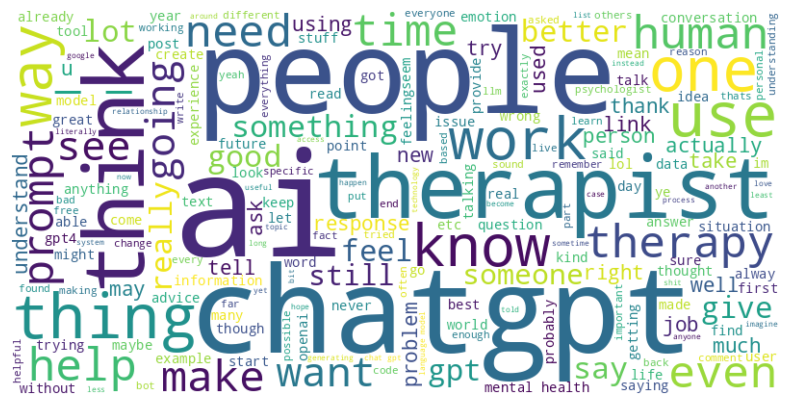

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_all['text']))
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("wordcloud_text.png")


In [ ]:
def extract_aspect(text):
  output = ''
  lines = text.split("\n")
  for line in lines:
    aspect = line.split(':')[0]
    terms = aspect.split(',')
    for term in terms:
      output += term.replace("'", '')
  return output
df_all['aspects'] = df_all['after_aspect_sentiment'].apply(extract_aspect)
worldcloud_aspect = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_all['aspects']))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


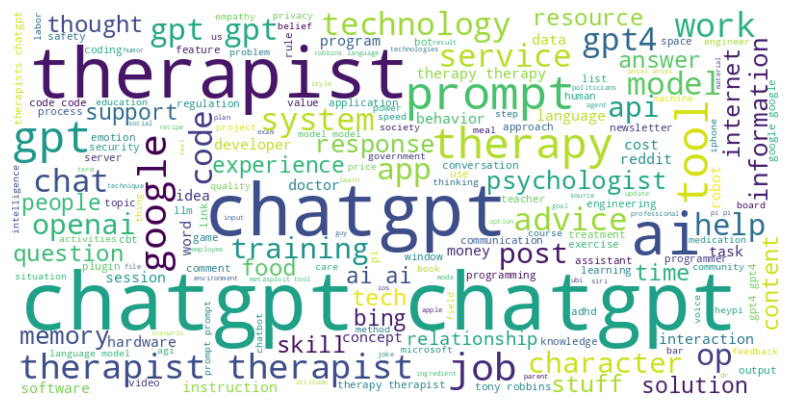

In [ ]:
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(worldcloud_aspect, interpolation='bilinear')
plt.axis("off")
plt.show()
worldcloud_aspect.to_file("wordcloud_aspect.png")

In [ ]:
import spacy
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Load the spaCy model with word vectors
nlp = spacy.load("en_core_web_sm")

def is_relevant(text):
  relevant_words = ['tech', 'gpt', 'ai', 'tool', 'therap', 'safety',
                   'data', 'info', 'llm', 'model',
                   'memory', 'psych', 'app', 'pi', 'robot', 'ethics', 'empathy']
  for word in relevant_words:
    if text.find(word) != -1:
      print("find " + word + " in " + text)
      return True
  return False
# Define a list of words you want to cluster
aspect_string = "".join(df_all['aspects'])
aspect_list = aspect_string.split('][')
reduced_aspects = [aspect.replace('[','').replace(']','') for aspect in aspect_list if is_relevant(aspect)]
# Process the words with spaCy and extract word vectors
word_vectors = [nlp(word).vector for word in reduced_aspects]

# Convert the word vectors to a NumPy array
word_vectors_array = np.array(word_vectors)

# Define the number of clusters (you may adjust this based on your needs)
num_clusters = 5

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(word_vectors_array)

# Create a dictionary to store words in each cluster
clusters = {i: [] for i in range(num_clusters)}

# Assign words to clusters based on the cluster labels
for i, label in enumerate(cluster_labels):
    clusters[label].append(reduced_aspects[i])

# Print the clusters
for cluster, words in clusters.items():
    print(f"Cluster {cluster}: {', '.join(words)}")

# Visualize the clusters (for 2D visualization)
# You may need to install additional libraries like PCA or TSNE for this
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors_array)

# Plot the clustered words
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, label in enumerate(cluster_labels):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1], c=colors[label], label=f'Cluster {label}')

plt.legend()
plt.show()


In [ ]:
from collections import Counter

aspect_list = ['tech', 'chatgpt', 'gpt', 'ai',  'llm', 'model', 'robot',
            'psych', 'therap',
           'data', 'info', 'safety','memory', 'ethics']
aspect = ""

def get_aspect(text):
  res = []
  if text is np.nan:
    return None
  lines = text.split('\n')
  for line in lines:
    term_aspt = line.split(":")
    for index, term in enumerate(term_aspt[0].split(',')):
      if term.strip("[]' ").find(aspect) == 0:
        if(term.strip("[]' ") != aspect):
            print(term + "%%%%%%%%%" + aspect)
        res.append(term_aspt[1].split(',')[index].strip("[]' "))
  if len(res) == 0:
    return None
  elif len(res) == 1:
    return res[0]
  elif len(res) > 1:
    item_counts = Counter(res)
    print("****************multiple same aspects")
    return item_counts.most_common(1)[0][0]

for term in aspect_list:
    aspect = term
    df_all[aspect] = df_all['after_aspect_sentiment'].apply(get_aspect)


In [ ]:
def agg_aspects(row):
  ai_cols = ['chatgpt', 'gpt', 'ai', 'llm', 'robot', 'model', 'tech']
  therapy_cols = ['therap', 'psych']
  concern_cols = ['memory', 'safety', 'data', 'info']
  ai_aspects = set([row[ai_col] for ai_col in ai_cols])
  if len(ai_aspects) == 0:
    ai_therapy = None
  elif(len(ai_aspects) == 1):
    ai_therapy = ai_aspects.pop()
  elif ai_aspects == set(["Positive", "Neutral"]):
    ai_therapy = "Positive"
  elif ai_aspects == set(["Negative", "Neutral"]):
    ai_therapy = "Negative"
  else:
    ai_therapy = row["overall_sentiment"]

  therapy_aspects = set([row[col] for col in therapy_cols])
  if len(therapy_aspects) == 0:
    real_therapy = None
  elif(len(therapy_aspects) == 1):
    real_therapy = therapy_aspects.pop()
  elif therapy_aspects == set(["Positive", "Neutral"]):
    real_therapy = "Positive"
  elif therapy_aspects == set(["Negative", "Neutral"]):
    real_therapy = "Negative"
  else:
    real_therapy = row["overall_sentiment"]

  concern_aspects = set([row[col] for col in concern_cols])
  if len(concern_aspects) == 0:
    concern = None
  elif(len(concern_aspects) == 1):
    concern = concern_aspects.pop()
  elif concern_aspects == set(["Positive", "Neutral"]):
    concern = "Positive"
  elif concern_aspects == set(["Negative", "Neutral"]):
    concern = "Negative"
  else:
    concern = row["overall_sentiment"]
  return ai_therapy, real_therapy, concern

ai_therapies = []
real_therapies = []
concerns = []
for index, row in df_all.iterrows():
  ai_therapy, real_therapy, concern= agg_aspects(row)
  ai_therapies.append(ai_therapy)
  real_therapies.append(real_therapy)
  concerns.append(concern)
new_df = pd.DataFrame({'ai_therapy':ai_therapies, 'real_therapy':real_therapies, 'concern':concerns})


In [ ]:
new_df.head

<bound method NDFrame.head of      ai_therapy real_therapy concern
0       neutral         None    None
1          None     positive    None
2          None         None    None
3          None         None    None
4          None         None    None
...         ...          ...     ...
8866    neutral      neutral    None
8867       None     negative    None
8868       None         None    None
8869       None         None    None
8870   positive         None    None

[8871 rows x 3 columns]>

In [ ]:
new_df.to_csv('select_aspects.csv', index=False)

In [ ]:
def split_aspect_sentiment(text):
  aspects = []
  sentiments = []
  if text is np.nan:
    return None
  lines = text.split("\n")
  for line in lines:
    before_ = line.split(':')[0].split(',')
    after_ = line.split(':')[1].split(',')
    aspects.extend([word.strip("'[]' ") for word in before_])
    sentiments.extend([word.strip("'[]' ") for word in after_])
  return aspects, sentiments

df_all[['aspect','sentiment']] = df_all['after_aspect_sentiment'].apply(split_aspect_sentiment)


In [ ]:
df_all.to_csv('select_aspect_sentiment.csv', index=False)